# Import modules

In [7]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
from nilearn import plotting
import numpy as np
from tqdm.notebook import tqdm

# Single image

In [2]:
imagepath = 'I:/projects/FLAIR_DL/augmentation/test/images/00a72dfb.nii'
labelpath = 'I:/projects/FLAIR_DL/augmentation/test/labels/00a72dfb.img'

In [3]:
image = nib.load(imagepath)
label = nib.load(labelpath)

In [4]:
print("=========image==========")
print(image)
print("=========label==========")
print(label)

=========image==========
<class 'nibabel.nifti1.Nifti1Image'>
data shape (480, 640, 40)
affine: 
[[-3.59172187e-01 -9.40526443e-03 -8.42331996e-02  9.41295853e+01]
 [-8.87283101e-03  3.58438768e-01 -2.71115367e-01 -9.93309631e+01]
 [-8.18558900e-03  2.41574281e-02  3.98991243e+00 -7.83868561e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 480 640  40   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.359375  0.359375  4.        0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyz

In [5]:
image_data = np.array(image.get_fdata())
label_data = np.array(label.get_fdata())

In [6]:
label_data = (np.rint(label_data)).astype(np.int16)

In [7]:
image_header = image.header
label_header = label.header

In [8]:
label_header_corrected = image.header

In [9]:
label_header_corrected["data_type"] = 'Word'
label_header_corrected["datatype"] = 4
label_header_corrected["db_name"] = 'ROI'
label_header_corrected["extents"] = 16384
label_header_corrected["session_error"] = 0
label_header_corrected["regular"] = 'r'
label_header_corrected["bitpix"] = 16
label_header_corrected["descrip"] = 'ROI'
label_header_corrected["aux_file"] = 'ROI Save As'

In [1]:
label_corrected = nib.Nifti1Image(label_data, affine=image.affine, header=label_header_corrected)
print(label_corrected)

NameError: name 'nib' is not defined

In [11]:
nib.save(label_corrected, 'I:/projects/FLAIR_DL/augmentation/test/labels/00a72dfb_test2.nii',)

C:\Users\Susumulab\anaconda3\envs\torchio_py39\lib\site-packages\numpy\ma\core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


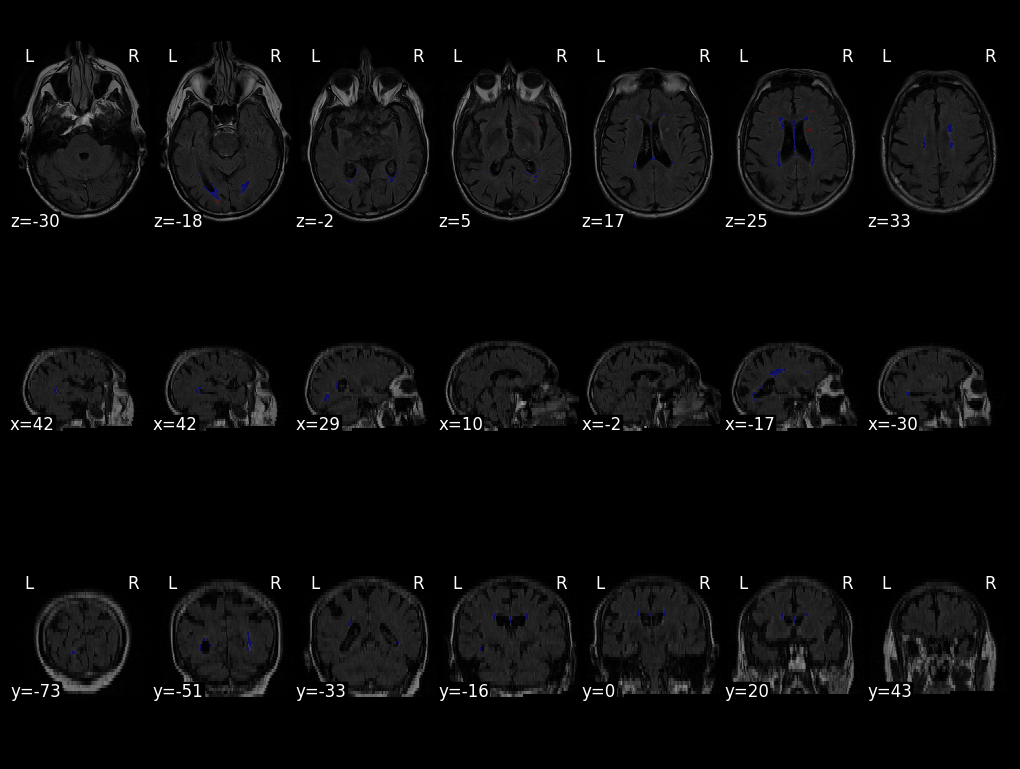

In [12]:
fig = plt.figure(figsize=(10, 7.5), facecolor="k", edgecolor="k")
plotting.plot_roi(roi_img=label_corrected, bg_img=image, cmap = "jet", display_mode="mosaic", figure=fig, threshold="auto", black_bg=True, alpha=0.7, view_type="continuous")

# Multiple images

In [8]:
filepath_image = 'I:/projects/FLAIR_DL/augmentation/PMCoE/images/'
filepath_label = 'I:/projects/FLAIR_DL/augmentation/PMCoE/labels_analyze/'
outpath = 'I:/projects/FLAIR_DL/augmentation/PMCoE/labels/'

In [9]:
filelist_image = [i for i in sorted(os.listdir(filepath_image)) if i.endswith(".nii")]
filelist_label = [i for i in sorted(os.listdir(filepath_label)) if i.endswith(".img")]

In [ ]:
progress = tqdm(zip(filelist_image, filelist_label), total=len(filelist_image))
for filename_image, filename_label in progress:
    assert os.path.splitext(filename_image)[0] == os.path.splitext(filename_label)[0] #make sure the subject name of image and label is same.
    progress.set_description(f"Processing... f{filename_label}")
    
    image = nib.load(os.path.join(filepath_image, filename_image))
    label = nib.load(os.path.join(filepath_label, filename_label))
    
    image_data = np.array(image.get_fdata())
    label_data = np.array(label.get_fdata())
    label_data = (np.rint(label_data)).astype(np.int16)
    image_header = image.header
    label_header = label.header
    label_header_corrected = image.header
    label_header_corrected["data_type"] = 'Word'
    label_header_corrected["datatype"] = 4
    label_header_corrected["db_name"] = 'ROI'
    label_header_corrected["extents"] = 16384
    label_header_corrected["session_error"] = 0
    label_header_corrected["regular"] = 'r'
    label_header_corrected["bitpix"] = 16
    label_header_corrected["descrip"] = 'ROI'
    label_header_corrected["aux_file"] = 'ROI Save As'
    
    label_corrected = nib.Nifti1Image(label_data, affine=image.affine, header=label_header_corrected)
    nib.save(label_corrected, os.path.join(outpath, filename_image))

  0%|          | 0/141 [00:00<?, ?it/s]